In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

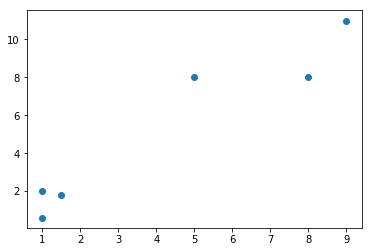

In [3]:
plt.scatter(x[ : , 0], x[ : , 1])
plt.show()

In [4]:
k_means = KMeans(n_clusters = 2)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[1 1 0 0 1 0]


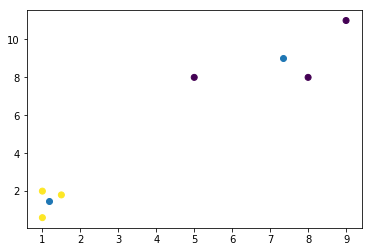

In [5]:
print(k_means.labels_)
plt.scatter(x[ : , 0], x[ : , 1], c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[: ,0], k_means.cluster_centers_[: ,1])
plt.show()

In [6]:
def euclid_distance(x1, x2) :
    return (((x1 - x2)**2).sum())**0.5


def get_mean(clusters) :
    mean_array = np.array([x[i] for i in range(len(clusters))])
    index = 0
    
    for key in clusters :
        data = x[clusters.get(key) , :]
        mean_array[index] = data.mean(axis = 0)
        index = index + 1
    
    return mean_array


def fit(x, k) :
    mean_array = np.array([x[i] for i in range(k)])
    clusters = {'cluster_' + str(i) : [] for i in range(k)}
    
    while True :
        for i in range(x.shape[0]) :
            min_distance = euclid_distance(x[i], mean_array[0])
            cluster_index = 0
        
            for j in range(mean_array.shape[0]) :
                current_distance = euclid_distance(x[i], mean_array[j])
            
                if current_distance < min_distance :
                    min_distance = current_distance
                    cluster_index = j

            clusters.get('cluster_' + str(cluster_index)).append(i)        
                            
        new_mean_array = get_mean(clusters)

        if np.absolute(mean_array - new_mean_array).sum() == 0 :
            break

        mean_array = new_mean_array
        clusters = {'cluster_' + str(i) : [] for i in range(k)}  
            
    return clusters, mean_array   

In [7]:
clusters, mean_array = fit(x, 2)

In [8]:
clusters, mean_array

({'cluster_0': [0, 1, 4], 'cluster_1': [2, 3, 5]},
 array([[ 1.16666667,  1.46666667],
        [ 7.33333333,  9.        ]]))